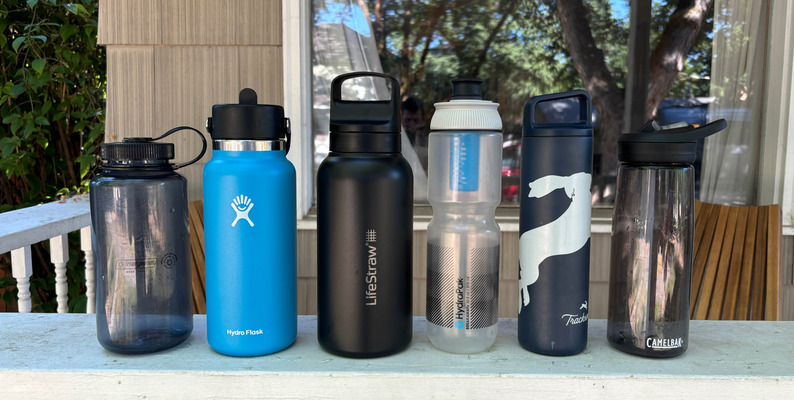

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

**DATA PREPROCESSING**

In [ ]:
df = pd.read_csv("/content/cleaned_reviews.csv")
df.head()

,index,product_name,overall_rating,rating,title,cleaned_review
0,0,"pexpo 24 Hrs Hot and Cold ISI Certified , Echo...",4.2,5,Super!,nice product
1,1,"pexpo 24 Hrs Hot and Cold ISI Certified , Echo...",4.2,4,Nice product,nice product minimum time hours full hot cold
2,2,"pexpo 24 Hrs Hot and Cold ISI Certified , Echo...",4.2,4,Good choice,really good product
3,3,"pexpo 24 Hrs Hot and Cold ISI Certified , Echo...",4.2,4,Good choice,firstly afraid quality reserving hot water hr ...
4,4,"pexpo 24 Hrs Hot and Cold ISI Certified , Echo...",4.2,5,Terrific purchase,good product


In [ ]:
df.isnull().sum()

,0
index,0
product_name,0
overall_rating,0
rating,0
title,0
cleaned_review,199


In [ ]:
# Drop rows where 'cleaned_review' is missing
df_cleaned = df.dropna(subset=['cleaned_review'])
# Display cleaned dataframe
df_cleaned.isnull().sum()

,0
index,0
product_name,0
overall_rating,0
rating,0
title,0
cleaned_review,0


In [ ]:
df_cleaned["rating"].value_counts()

,count
rating,
5,50450
4,14656
3,5317
1,4731
2,2052


In [ ]:
# Define sentiment mapping
sentiment_map = {5: 'Positive', 4: 'Positive', 3: 'Negative', 1: 'Negative', 2: 'Negative'}
df_cleaned['sentiment'] = df_cleaned['rating'].map(sentiment_map)
df_cleaned['sentiment'].value_counts()

<ipython-input-6-41a4340e4d87>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['sentiment'] = df_cleaned['rating'].map(sentiment_map)


,count
sentiment,
Positive,65106
Negative,12100


In [ ]:
import nltk
import re
import matplotlib.pyplot as plt
import seaborn as sns
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM, Dropout, Bidirectional, GRU
from tensorflow.keras.layers import Dense
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 77206 entries, 0 to 77404
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   index           77206 non-null  int64  
 1   product_name    77206 non-null  object 
 2   overall_rating  77206 non-null  float64
 3   rating          77206 non-null  int64  
 4   title           77206 non-null  object 
 5   cleaned_review  77206 non-null  object 
 6   sentiment       77206 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 4.7+ MB


In [ ]:
# Ensure NLTK resources are available
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

# Import required libraries
import re
import pandas as pd
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Initialize stopwords and lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    if not isinstance(text, str):  # Handle non-string values
        return ""
    text = re.sub(r'[^a-zA-Z]', ' ', text)  # Keep letters only
    text = text.lower().split()
    text = [lemmatizer.lemmatize(word) for word in text if word not in stop_words]
    return ' '.join(text)

# Apply text cleaning safely
df_cleaned['cleaned_review'] = df_cleaned['cleaned_review'].astype(str).apply(clean_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
<ipython-input-9-4a518d738065>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['cleaned_review'] = df_cleaned['cleaned_review'].astype(str).apply(clean_text)


In [ ]:
df_cleaned["sentiments"] = df_cleaned["sentiment"].map({"Positive":1,"Negative":0})
df_cleaned.head()

<ipython-input-10-0d6655dccef1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned["sentiments"] = df_cleaned["sentiment"].map({"Positive":1,"Negative":0})


,index,product_name,overall_rating,rating,title,cleaned_review,sentiment,sentiments
0,0,"pexpo 24 Hrs Hot and Cold ISI Certified , Echo...",4.2,5,Super!,nice product,Positive,1
1,1,"pexpo 24 Hrs Hot and Cold ISI Certified , Echo...",4.2,4,Nice product,nice product minimum time hour full hot cold,Positive,1
2,2,"pexpo 24 Hrs Hot and Cold ISI Certified , Echo...",4.2,4,Good choice,really good product,Positive,1
3,3,"pexpo 24 Hrs Hot and Cold ISI Certified , Echo...",4.2,4,Good choice,firstly afraid quality reserving hot water hr ...,Positive,1
4,4,"pexpo 24 Hrs Hot and Cold ISI Certified , Echo...",4.2,5,Terrific purchase,good product,Positive,1


**SPLITTING THE DATASET INTO TRAIN AND TEST SPLITS**

In [ ]:
from sklearn.model_selection import train_test_split
# Train-Test Split
X = df_cleaned["cleaned_review"]
y = df_cleaned["sentiments"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

**Bag of Words**

In [ ]:
# Bag of Words
bow_vectorizer = CountVectorizer(max_features=5000)
X_train_bow = bow_vectorizer.fit_transform(X_train)
X_test_bow = bow_vectorizer.transform(X_test)

In [ ]:
smote = SMOTE(random_state=42)
X_train_bow, y_train = smote.fit_resample(X_train_bow, y_train)

In [ ]:
# Random Forest
rf = RandomForestClassifier(n_estimators=300)
rf.fit(X_train_bow, y_train)
pred_rf = rf.predict(X_test_bow)
print("Random Forest (BoW):\n", classification_report(y_test, pred_rf))

Random Forest (BoW):
               precision    recall  f1-score   support

           0       0.73      0.82      0.77      2447
           1       0.97      0.94      0.95     12995

    accuracy                           0.92     15442
   macro avg       0.85      0.88      0.86     15442
weighted avg       0.93      0.92      0.93     15442



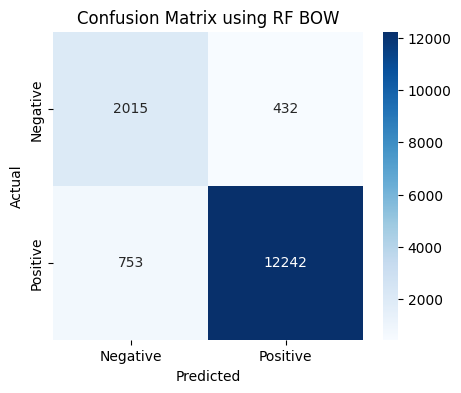

In [ ]:
cm = confusion_matrix(y_test, pred_rf)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix using RF BOW")
plt.show()

In [ ]:
# XGBoost
xgb = XGBClassifier(n_estimators = 300, eval_metric='logloss')
xgb.fit(X_train_bow, y_train)
pred_xgb = xgb.predict(X_test_bow)
print("XGBoost (BoW):\n", classification_report(y_test, pred_xgb))

XGBoost (BoW):
               precision    recall  f1-score   support

           0       0.78      0.76      0.77      2447
           1       0.96      0.96      0.96     12995

    accuracy                           0.93     15442
   macro avg       0.87      0.86      0.87     15442
weighted avg       0.93      0.93      0.93     15442



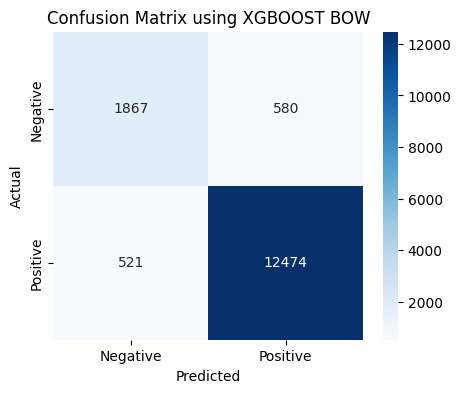

In [ ]:
cm = confusion_matrix(y_test, pred_xgb)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix using XGBOOST BOW")
plt.show()

In [ ]:
# AdaBoost
ada = AdaBoostClassifier(n_estimators= 300)
ada.fit(X_train_bow, y_train)
pred_ada = ada.predict(X_test_bow)
print("AdaBoost (BoW):\n", classification_report(y_test, pred_ada))

AdaBoost (BoW):
               precision    recall  f1-score   support

           0       0.46      0.71      0.56      2447
           1       0.94      0.84      0.89     12995

    accuracy                           0.82     15442
   macro avg       0.70      0.78      0.72     15442
weighted avg       0.86      0.82      0.84     15442



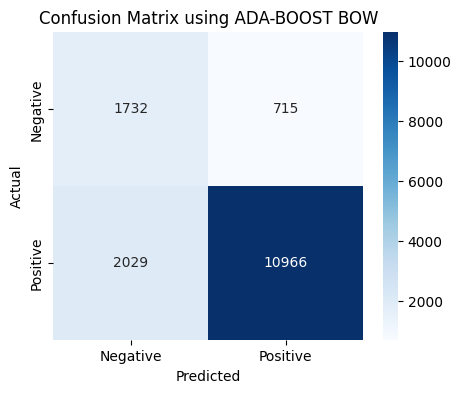

In [ ]:
cm = confusion_matrix(y_test, pred_ada)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix using ADA-BOOST BOW")
plt.show()

In [ ]:
# Train-Test Split
X = df_cleaned["cleaned_review"]
y = df_cleaned["sentiments"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**TFIDF**

In [ ]:
# TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=2000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [ ]:
smote = SMOTE(random_state=42)
X_train_tfidf, y_train = smote.fit_resample(X_train_tfidf, y_train)

In [ ]:
# Random Forest
rf = RandomForestClassifier(n_estimators= 300)
rf.fit(X_train_tfidf, y_train)
pred_rf_tfidf = rf.predict(X_test_tfidf)
print("Random Forest (TF-IDF):\n", classification_report(y_test, pred_rf_tfidf))

Random Forest (TF-IDF):
               precision    recall  f1-score   support

           0       0.81      0.80      0.81      2447
           1       0.96      0.96      0.96     12995

    accuracy                           0.94     15442
   macro avg       0.89      0.88      0.89     15442
weighted avg       0.94      0.94      0.94     15442



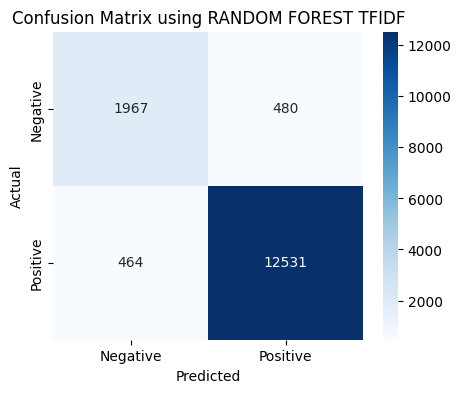

In [ ]:
cm = confusion_matrix(y_test, pred_rf_tfidf)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix using RANDOM FOREST TFIDF")
plt.show()

In [ ]:
# XGBoost
xgb = XGBClassifier(n_estimators = 300, eval_metric='logloss')
xgb.fit(X_train_tfidf, y_train)
pred_xg_tfidf = rf.predict(X_test_tfidf)
print("XGBoost (TF-IDF):\n", classification_report(y_test, pred_xg_tfidf))

XGBoost (TF-IDF):
               precision    recall  f1-score   support

           0       0.81      0.80      0.81      2447
           1       0.96      0.96      0.96     12995

    accuracy                           0.94     15442
   macro avg       0.89      0.88      0.89     15442
weighted avg       0.94      0.94      0.94     15442



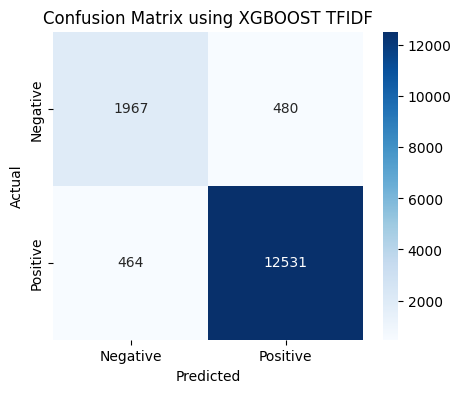

In [ ]:
cm = confusion_matrix(y_test, pred_xg_tfidf)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix using XGBOOST TFIDF")
plt.show()

In [ ]:
# AdaBoost
ada = AdaBoostClassifier(n_estimators= 400)
ada.fit(X_train_tfidf, y_train)
pred_ada_tfidf = rf.predict(X_test_tfidf)
print("AdaBoost (TF-IDF):\n", classification_report(y_test, pred_ada_tfidf))

AdaBoost (TF-IDF):
               precision    recall  f1-score   support

           0       0.81      0.80      0.81      2447
           1       0.96      0.96      0.96     12995

    accuracy                           0.94     15442
   macro avg       0.89      0.88      0.89     15442
weighted avg       0.94      0.94      0.94     15442



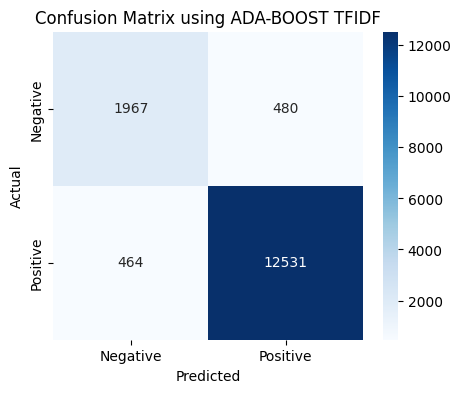

In [ ]:
cm = confusion_matrix(y_test, pred_ada_tfidf)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix using ADA-BOOST TFIDF")
plt.show()

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional, GRU

In [ ]:
# Tokenization
max_words = 10000  # Vocabulary size
max_len = 128     # Max length of a comment

tokenizer = Tokenizer(num_words=max_words, oov_token="")
tokenizer.fit_on_texts(df_cleaned['cleaned_review'].astype(str))
sequences = tokenizer.texts_to_sequences(df_cleaned['cleaned_review'].astype(str))
padded_sequences = pad_sequences(sequences, maxlen=max_len, padding='post', truncating='post')
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, df_cleaned['sentiments'], test_size=0.2, random_state=42)

In [ ]:
from sklearn.utils.class_weight import compute_class_weight
# Assuming y_train contains binary labels (0 and 1)
classes = np.unique(y_train)  # Unique class labels
class_weights = compute_class_weight(class_weight="balanced", classes=classes, y=y_train)
# Convert to dictionary format for model.fit()
class_weight_dict = {i: class_weights[i] for i in range(len(classes))}

**LSTM**

In [ ]:
# Build LSTM Model
model = Sequential([
    Embedding(input_dim=max_words, output_dim=100, input_length=max_len),
    LSTM(128, return_sequences=True),
    Dropout(0.3),
    LSTM(64),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification (positive/negative)
])
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.build(input_shape=(None, max_len))
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 128, 100)            │       1,000,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 128, 128)            │         117,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128, 128)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,168,769 (4.46 MB)

 Trainable params: 1,168,769 (4.46 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=64, class_weight = class_weight_dict)

Epoch 1/50
966/966 ━━━━━━━━━━━━━━━━━━━━ 23s 18ms/step - accuracy: 0.3738 - loss: 0.6960 - val_accuracy: 0.1585 - val_loss: 0.6969
Epoch 2/50
966/966 ━━━━━━━━━━━━━━━━━━━━ 15s 16ms/step - accuracy: 0.3784 - loss: 0.6936 - val_accuracy: 0.8415 - val_loss: 0.6916
Epoch 3/50
966/966 ━━━━━━━━━━━━━━━━━━━━ 21s 16ms/step - accuracy: 0.7210 - loss: 0.6934 - val_accuracy: 0.8415 - val_loss: 0.6926
Epoch 4/50
966/966 ━━━━━━━━━━━━━━━━━━━━ 20s 16ms/step - accuracy: 0.4577 - loss: 0.6953 - val_accuracy: 0.8415 - val_loss: 0.6911
Epoch 5/50
966/966 ━━━━━━━━━━━━━━━━━━━━ 21s 16ms/step - accuracy: 0.7777 - loss: 0.6926 - val_accuracy: 0.8415 - val_loss: 0.6931
Epoch 6/50
966/966 ━━━━━━━━━━━━━━━━━━━━ 20s 16ms/step - accuracy: 0.3242 - loss: 0.6961 - val_accuracy: 0.8415 - val_loss: 0.6916
Epoch 7/50
966/966 ━━━━━━━━━━━━━━━━━━━━ 22s 17ms/step - accuracy: 0.7653 - loss: 0.6897 - val_accuracy: 0.1585 - val_loss: 0.7156
Epoch 8/50
966/966 ━━━━━━━━━━━━━━━━━━━━ 20s 17ms/step - accuracy: 0.3902 - loss: 0.6928 - 

In [ ]:
y_pred_lstm = model.predict(X_test)
y_pred_lstm = np.where(y_pred_lstm > 0.5, 1, 0)

483/483 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step


In [ ]:
print(classification_report(y_test, y_pred_lstm))

              precision    recall  f1-score   support

           0       0.16      1.00      0.27      2447
           1       0.00      0.00      0.00     12995

    accuracy                           0.16     15442
   macro avg       0.08      0.50      0.14     15442
weighted avg       0.03      0.16      0.04     15442



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


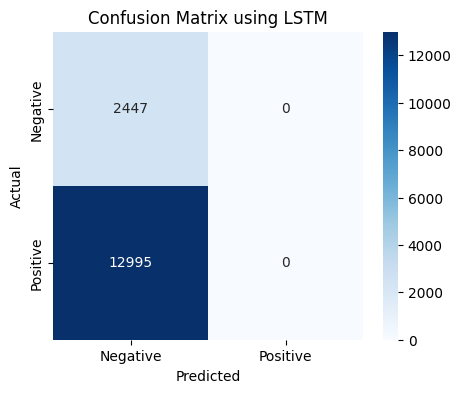

In [ ]:
cm = confusion_matrix(y_test, y_pred_lstm)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix using LSTM")
plt.show()

**BI-LSTM**

In [ ]:
model = Sequential([Embedding(input_dim=max_words, output_dim=100, input_length=max_len),
                    Bidirectional(LSTM(units=128, return_sequences=False)),
                    Dense(1, activation='sigmoid')])
# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.build((None, max_len))
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ (None, 128, 100)            │       1,000,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ (None, 256)                 │         234,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,234,753 (4.71 MB)

 Trainable params: 1,234,753 (4.71 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=64, class_weight=class_weight_dict)

Epoch 1/50
966/966 ━━━━━━━━━━━━━━━━━━━━ 23s 17ms/step - accuracy: 0.8560 - loss: 0.4582 - val_accuracy: 0.9124 - val_loss: 0.3088
Epoch 2/50
966/966 ━━━━━━━━━━━━━━━━━━━━ 23s 20ms/step - accuracy: 0.9191 - loss: 0.3080 - val_accuracy: 0.9314 - val_loss: 0.2266
Epoch 3/50
966/966 ━━━━━━━━━━━━━━━━━━━━ 21s 20ms/step - accuracy: 0.9227 - loss: 0.2795 - val_accuracy: 0.9262 - val_loss: 0.2503
Epoch 4/50
966/966 ━━━━━━━━━━━━━━━━━━━━ 17s 18ms/step - accuracy: 0.9264 - loss: 0.2606 - val_accuracy: 0.9310 - val_loss: 0.2539
Epoch 5/50
966/966 ━━━━━━━━━━━━━━━━━━━━ 20s 18ms/step - accuracy: 0.9291 - loss: 0.2510 - val_accuracy: 0.9301 - val_loss: 0.2436
Epoch 6/50
966/966 ━━━━━━━━━━━━━━━━━━━━ 20s 18ms/step - accuracy: 0.9348 - loss: 0.2467 - val_accuracy: 0.9367 - val_loss: 0.2270
Epoch 7/50
966/966 ━━━━━━━━━━━━━━━━━━━━ 23s 20ms/step - accuracy: 0.9330 - loss: 0.2389 - val_accuracy: 0.9360 - val_loss: 0.2403
Epoch 8/50
966/966 ━━━━━━━━━━━━━━━━━━━━ 19s 19ms/step - accuracy: 0.9386 - loss: 0.2329 - 

In [ ]:
y_pred_bi = model.predict(X_test)
y_pred_bi = np.where(y_pred_bi > 0.5, 1, 0)

483/483 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step


In [ ]:
print(classification_report(y_test, y_pred_bi))

              precision    recall  f1-score   support

           0       0.83      0.81      0.82      2447
           1       0.96      0.97      0.97     12995

    accuracy                           0.94     15442
   macro avg       0.90      0.89      0.89     15442
weighted avg       0.94      0.94      0.94     15442



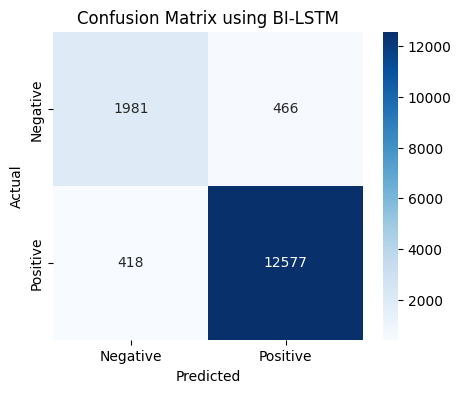

In [ ]:
cm = confusion_matrix(y_test, y_pred_bi)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix using BI-LSTM")
plt.show()

<ipython-input-47-fcbdaf6e9186>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Accuracy', y='Model', data=accuracy_df, palette='viridis')


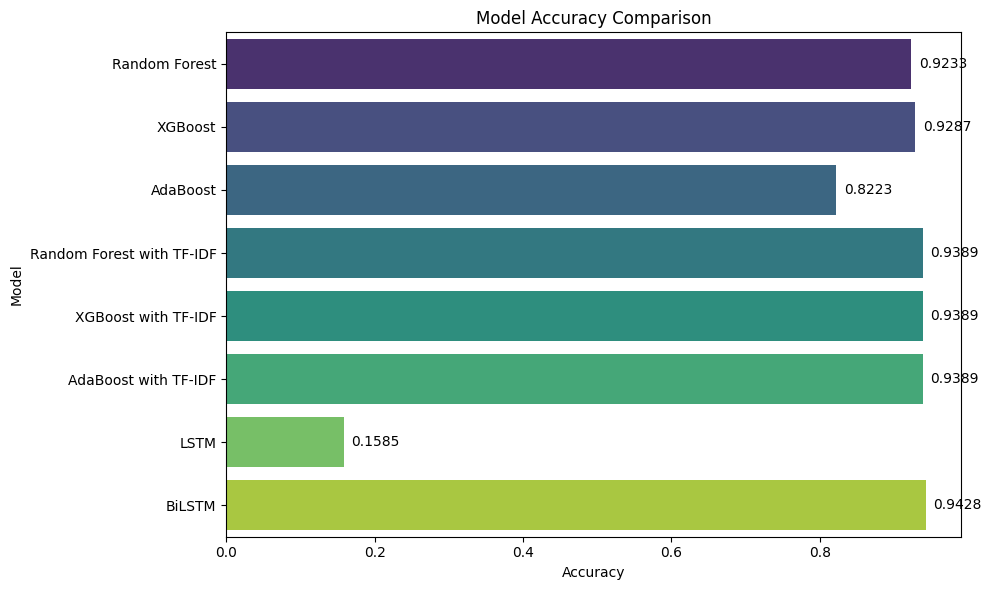

In [ ]:
# Calculate accuracy for each model
acc_rf = accuracy_score(y_test, pred_rf)
acc_xgb = accuracy_score(y_test, pred_xgb)
acc_ada = accuracy_score(y_test, pred_ada)
acc_rf_tfidf = accuracy_score(y_test, pred_rf_tfidf)
acc_xg_tfidf = accuracy_score(y_test, pred_xg_tfidf)
acc_ada_tfidf = accuracy_score(y_test, pred_ada_tfidf)
acc_lstm = accuracy_score(y_test, y_pred_lstm)
acc_bi = accuracy_score(y_test, y_pred_bi)
# Create a dictionary with model names and corresponding accuracy values
accuracy_dict = {
    'Random Forest': acc_rf,
    'XGBoost': acc_xgb,
    'AdaBoost': acc_ada,
    'Random Forest with TF-IDF': acc_rf_tfidf,
    'XGBoost with TF-IDF': acc_xg_tfidf,
    'AdaBoost with TF-IDF': acc_ada_tfidf,
    'LSTM': acc_lstm,
    'BiLSTM': acc_bi
    }
# Convert dictionary to DataFrame for easy plotting
accuracy_df = pd.DataFrame(list(accuracy_dict.items()), columns=['Model', 'Accuracy'])
# Create a barplot
plt.figure(figsize=(10, 6))
sns.barplot(x='Accuracy', y='Model', data=accuracy_df, palette='viridis')
# Add the accuracy values on top of the bars
for index, value in enumerate(accuracy_df['Accuracy']):
    plt.text(value + 0.01, index, f'{value:.4f}', va='center')
# Set labels and title
plt.xlabel('Accuracy')
plt.ylabel('Model')
plt.title('Model Accuracy Comparison')
# Show the plot
plt.tight_layout()
plt.show()